In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.utils import shuffle
from PIL import Image

#define functions to pre process the images
def normalize(img):
    a=0
    b=1
    minClr=0
    maxClr=255
    return a+(((img-minClr)*(b-a))/(maxClr-minClr))

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def pre_proc_one_image(image):
    image = normalize(image)
    image= image[55:, :,:]
    image= image[:80,:,:]
    
    #resize image
    r = 80.0 /image.shape[1]
    dim = (80, int(image.shape[0] * r))
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return image

def flip(image):
    flipped=np.ndarray((image.shape))
    flipped[:,:,0] = np.fliplr(image[:,:,0])
    flipped[:,:,1] = np.fliplr(image[:,:,1])
    flipped[:,:,2] = np.fliplr(image[:,:,2])
    return flipped

In [10]:
#-----------------------load images + process them / load labels--------
#takes the csv file and creates a list with the images and another list with the respective steering angles


X_train = []
y_train = []

path_to_data = 'data/data/'
csv_file = 'driving_log.csv'
#csv_file = 'small.csv'


with open(path_to_data + csv_file) as csv_file:
    csv_file.readline()
    flag=0
    stangle=0
    
    for i in csv_file:
        image = plt.imread(path_to_data + i.split(',')[0])
#         image1 = plt.imread(path_to_data + i.split(', ')[1])
#         image2 = plt.imread(path_to_data + i.split(', ')[2])
        stangle=float(i.split(',')[3])
        if stangle==0:
            if flag!=2:
                y_train.append(stangle)
                image=augment_brightness_camera_images(image)
                X_train.append(pre_proc_one_image(image))
                flag=flag+1
            else:
                pass
        else:
            y_train.append(stangle)
            image=augment_brightness_camera_images(image)
            X_train.append(pre_proc_one_image(image))
            
            y_train.append(-1*stangle)
            X_train.append(pre_proc_one_image(flip(image)))
            
#             y_train.append(stangle)
#             image=augment_brightness_camera_images(image1)
#             X_train.append(pre_proc_one_image(image1))
            
# #             y_train.append(-1*stangle)
# #             X_train.append(pre_proc_one_image(flip(image1)))
            
#             y_train.append(stangle)
#             image=augment_brightness_camera_images(image2)
#             X_train.append(pre_proc_one_image(image2))
            
#             y_train.append(-1*stangle)
#             X_train.append(pre_proc_one_image(flip(image2)))
            flag=0
        
        
#epa.. estava mais ou menos so com a camera central e flip....
#mas pus as outras cameras e piorou...
        
        
print("done")

done


image example:
(8236, 20, 80, 3)


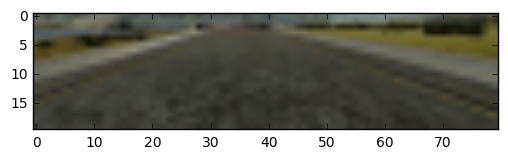

In [11]:
#converts lists to a numpy array and prints an example of a new image

X_train = np.array(X_train,dtype=np.float16)
y_train = np.array(y_train,dtype=np.float16)

print("image example:")
print(X_train.shape)
image=X_train[3]
plt.imshow(image)
plt.show()

#print(X_train.nbytes)


In [12]:
#shuffles data and reserves 10% of it to be used as the test set

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=57)


In [19]:
#defines model architecture

from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization


model = Sequential()

model.add(Convolution2D(64, 3, 3, border_mode='valid', input_shape=(20, 80,3)))
#model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))


model.add(Convolution2D(32, 3, 3))
model.add(Activation('elu'))
model.add(MaxPooling2D((2, 2)))


model.add(Convolution2D(16, 3, 3))
model.add(Activation('elu'))
# model.add(MaxPooling2D((2, 2)))


# model.add(Convolution2D(8, 3, 3))
# model.add(Activation('elu'))


model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(160))
model.add(Activation('elu'))

model.add(Dense(160))
model.add(Activation('elu'))

model.add(Dense(160))
model.add(Activation('elu'))

model.add(Dense(128))
model.add(Activation('elu'))

model.add(Dense(128))
model.add(Activation('elu'))

model.add(Dense(64))
model.add(Activation('elu'))

model.add(Dense(64))
model.add(Activation('elu'))

model.add(Dense(32))
model.add(Activation('elu'))

model.add(Dense(32))
model.add(Activation('elu'))

model.add(Dropout(0.5))
          
model.add(Dense(1))


In [20]:
#train the model

model.compile('adam', 'mean_squared_error', ['accuracy'])
history = model.fit(X_train, y_train, nb_epoch=1, validation_split=0.2)



Train on 5929 samples, validate on 1483 samples
Epoch 1/1
5929/5929 [==============================] - 273s - loss: 0.0292 - acc: 0.1084 - val_loss: 0.0194 - val_acc: 0.1045


In [21]:
metrics = model.evaluate(X_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

824/824 [==============================] - 26s    
loss: 0.01998411173236023
acc: 0.10679611650485436


In [22]:
#saves model weights/info into files

from keras.models import model_from_json
import json

json_string = model.to_json()
with open('model.json', 'w') as outfile:
    json.dump(json_string, outfile)

# model = model_from_json(json_string)

model.save_weights('model.h5')

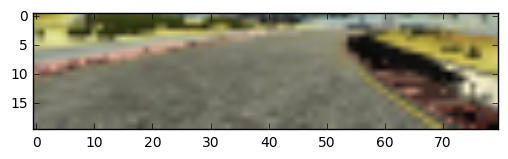

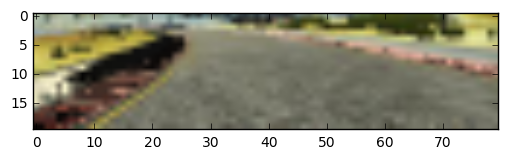

0.09296496212482452


In [23]:
image=X_train[3]
plt.imshow(image)
plt.show()


flipped_img = np.ndarray((image.shape))
flipped_img[:,:,0] = np.fliplr(image[:,:,0])
flipped_img[:,:,1] = np.fliplr(image[:,:,1])
flipped_img[:,:,2] = np.fliplr(image[:,:,2])
plt.imshow(flipped_img)
plt.show()


image=image[None,:,:,:]

steering_angle = float(model.predict(image, batch_size=1))
print(steering_angle)